<a href="https://colab.research.google.com/github/anaptoro/git_geotec2/blob/main/Aula6_a_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture 
# O comando capture é utilizado para que os outputs da célula não sejam exibidos, se quiser exibir, é só comentar a linha
!pip install geemap # pip é o comando de instalação no python, quando vc coloca a ! na frente do comando, vc está executando como se fosse no prompt de comando

In [2]:
%%capture
!pip install geopandas

In [3]:
# import geemap #aqui vc está importando a biblioteca
import ee

In [4]:
import geemap
import geopandas as gpd

In [6]:
Map = geemap.Map() #esse comando vai exigir uma autenticação

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=ygO-QasuEpeEyrZO7wm7tgDYgrfuQDbp1_j5qT054Y8&tc=w9hUWlIQ9owjB1JqDPhDgvgU-yUaDw6OuJpxw-NsXCQ&cc=UxL4MQXmQoEsjn4AIYqqAUVmxqp4VEA-yArCelJS7EQ

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfgeXvtjvYQbQApIDqOL_xjurUWyZ65w7YOkOHLZC38z0OO3ogxraHWfPz8

Successfully saved authorization token.


In [7]:
AE = ee.FeatureCollection('users/gleyce/ROI_Campina')

In [8]:
#carregando as duas classificações
RF1 = ee.Image('users/gleyce/RF1')
RF2 = ee.Image('users/gleyce/RF2')

In [11]:
lista_new=[10,20,30]
lista_raw=[1,2,3]
# //Reclassificando novamente para retornar classes para 0 até o número da última classe (4)
M2004 = RF1.remap(lista_raw,lista_new,0,'b1')# 3 classes

M2016 = RF2.remap(lista_raw,lista_new,0,'b1')#// 3 classes


In [12]:
igbpPalette = [
  'aec3d4', # nativa
  '152106', '225129', '369b47', '30eb5b', '387242', # forest
  '6a2325', 'c3aa69', 'b76031', 'd9903d', '91af40',  # pasto
  # '111149', # wetlands
  # 'cdb33b', # croplands
  # 'cc0013', # urban
  # '33280d', # crop mosaic
  # 'd7cdcc', # snow and ice
  # 'f7e084', # barren
  # '6f6f6f'  # tundra
]

Map = geemap.Map()
Map.addLayer(M2004,{'palette': igbpPalette, 'min': 10, 'max': 30},'M2004')
Map.addLayer(M2016,{'palette': igbpPalette, 'min': 10, 'max': 30},'M2016')
Map.centerObject(AE, 13)
Map

Map(center=[-21.619223403207844, -51.886861533829226], controls=(WidgetControl(options=['position', 'transpare…

In [13]:
#Para realizar a diferença entre os mapas precisamos reclassificar os valores de um dos mapas
RM2016 = M2016.remap([10,20,30],[100,200,300], 0, 'remapped');    
Map.addLayer(M2004,{'palette': igbpPalette, 'min': 10, 'max': 30},'M2004')
Map.addLayer(RM2016, { 'palette': igbpPalette, 'min': 100, 'max': 300,}, 'RM2016')
Map

Map(bottom=1177917.0, center=[-21.619223403207844, -51.886861533829226], controls=(WidgetControl(options=['pos…

In [14]:
# //Listar valores das diferentes classes para L5 e L8;
# //Listar valores das diferentes classes para L5 e L8;
classe0_L5 = 10 #Nativa
classe0_L8 = 100 #Nativa
classe1_L5 = 20 #umido
classe1_L8 = 200 #umido
classe2_L5 = 30 #ag
classe2_L8 = 300 #ag
# classe3_L5 = 3 #anual
# classe3_L8 = 400 #anual
# classe4_L5 = 4 #pastagem
# classe4_L8 = 500 #pastagem

In [15]:
#Achando o valor da diferença das classes no mapa
dif_class = classe0_L8-classe1_L5 #;//o que é agricultura anual em 2016 e era pastagem em 2004
print("Pastagem --> Agricultura Anual:", dif_class);
same_class = classe0_L8-classe0_L5 #;//o que permaneceu como agricultura anual entre 2004 e 2016
print("Agricultura Anual --> Agricultura Anual:", same_class);

Pastagem --> Agricultura Anual: 80
Agricultura Anual --> Agricultura Anual: 90


In [16]:
#Calculando a diferença entre os mapas do ano inicial e do ano final
diff = RM2016.subtract(M2004)

In [17]:
#Criação de raster de mudança de uso da terra de acordo com a classe de interesse

# Change = Change.updateMask(Change.eq(99))
Change = diff
Change = Change.updateMask(diff.eq(80)) #;//Nesse caso, o valor 396 é referente a mudança Pastagem --> Anual. Colocar o valor da sua classe de 

In [18]:
Map = geemap.Map()
Map.addLayer(Change, {},'Mudança')
Map.centerObject(AE, 13)
Map

Map(center=[-21.619223403207844, -51.886861533829226], controls=(WidgetControl(options=['position', 'transpare…

In [19]:
#Criação de raster de não mudança de uso da terra de acordo com a classe de interesse
nchange = diff.updateMask(diff.eq(90))#; //Nesse caso, o valor 90 significa que em 2006 era Anual e em 2016 também era Anual
Map.addLayer(nchange,{'palette':['green']},'Não Mudança')
Map

Map(bottom=1177917.0, center=[-21.619223403207844, -51.886861533829226], controls=(WidgetControl(options=['pos…

In [20]:
print(RM2016.getInfo())

{'type': 'Image', 'bands': [{'id': 'remapped', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 300}, 'dimensions': [342, 284], 'crs': 'EPSG:32722', 'crs_transform': [30, 0, 403080, 0, -30, 7613310]}], 'version': 1666289135440986, 'id': 'users/gleyce/RF2', 'properties': {'system:footprint': {'type': 'LinearRing', 'coordinates': [[-51.93634250763131, -21.580631427968452], [-51.936345009733806, -21.580665154559973], [-51.936839055711516, -21.657361916577617], [-51.936721859705976, -21.65748691912817], [-51.93662234011626, -21.657624646524933], [-51.93657471927739, -21.65763333339396], [-51.83768977970935, -21.65816159754201], [-51.837555266042614, -21.65805253625693], [-51.83740721266428, -21.657959979860685], [-51.83740020089012, -21.657926823357688], [-51.83739770244204, -21.657893120903026], [-51.83695612334484, -21.58119433829905], [-51.83707338854696, -21.581069315426696], [-51.83717292308805, -21.580931710576593], [-51.837220554649136, -21.580923058759833], [

### Aula 27/10/2022 - Cálculo área de mudança

In [21]:
a = ee.Geometry(AE.geometry())
area = a.area().divide(1000 * 1000).getInfo()
print('area',area)

area 83.82599717544534


In [22]:
# waterArea = Change.multiply(a).rename('waterArea')

In [23]:
rem = Change.select('remapped')

In [24]:
area = ee.Image.pixelArea().addBands(rem)

In [25]:
hist = Change.select('remapped').reduceRegion(**{
      'reducer': ee.Reducer.autoHistogram(),
      'geometry': AE.geometry(), #need to be a geometry
      'maxPixels': 1e12
})
dic = hist.getInfo()['remapped']
codes = [ dic[i][0] for i in range(len(dic))] 

In [26]:
import pandas as pd 

columns=['code', 'n_pixel2']
row_list = []
for code in codes:
    code = int(code)
    mask = Change.select('remapped').eq(code)
    mask_surface = mask.multiply(ee.Image.pixelArea())
    stats = mask_surface.reduceRegion(**{
        'reducer': ee.Reducer.count(),
        'geometry': AE.geometry(),
        'maxPixels': 1e13
    })

    row_list.append({
        columns[0]: code, 
        columns[1]: stats.getInfo()['remapped']
    })

    
hist_change = pd.DataFrame(row_list)

In [27]:
hist_change

,code,n_pixel2
0,80,2761


In [28]:
hist_change['area'] = hist_change['n_pixel2']*900
hist_change


,code,n_pixel2,area
0,80,2761,2484900


In [29]:
hist_nchange = nchange.select('remapped').reduceRegion(**{
      'reducer': ee.Reducer.autoHistogram(),
      'geometry': AE.geometry(), #need to be a geometry
      'maxPixels': 1e12
})
dic = hist_nchange.getInfo()['remapped']
codes = [ dic[i][0] for i in range(len(dic))] 

In [30]:


columns=['code', 'n_pixel']
row_list = []
for code in codes:
    code = int(code)
    mask = nchange.select('remapped').eq(code)
    mask_surface = mask.multiply(ee.Image.pixelArea())
    stats = mask_surface.reduceRegion(**{
        'reducer': ee.Reducer.count(),
        'geometry': AE.geometry(),
        'maxPixels': 1e13
    })

    row_list.append({
        columns[0]: code, 
        columns[1]: stats.getInfo()['remapped']
    })

    
hist_nchange = pd.DataFrame(row_list)

In [31]:
hist_nchange['area'] = hist_nchange['n_pixel']*900

In [32]:
hist_nchange

,code,n_pixel,area
0,90,10620,9558000


### Gerar pontos aleatórios para a análise de mudança
#### Criar um vetor de pontos centrais com base no raster de diferença entre os mapas

In [33]:
class_diff=diff.reduceToVectors(scale= 30,
  geometryType= 'centroid',
  eightConnected= False,
  bestEffort= True,
  maxPixels= 1e5,
  labelProperty= 'remapped'
)


In [34]:
Map.addLayer(class_diff, {},'classdiff')
Map

Map(bottom=1177917.0, center=[-21.619223403207844, -51.886861533829226], controls=(WidgetControl(options=['pos…

In [35]:
gdf = geemap.ee_to_geopandas(class_diff, selectors=['count', 'remapped','coordinates'])
# gdf.remapped.value_counts()
gdf.remapped.value_counts()
# gdf.head(10)

170    1031
280     998
180     567
80      382
270     326
70      231
90      172
290     136
190     128
200      52
300      27
100      11
0         2
Name: remapped, dtype: int64

In [36]:
gdf = gdf.loc[(gdf['remapped'] == 90) | (gdf['remapped'] == 80)]


In [37]:
gdf.remapped.value_counts()

80    382
90    172
Name: remapped, dtype: int64

In [38]:
stratified = gdf.groupby('remapped').apply(lambda x: x.sample(10)).reset_index(drop=True)

In [39]:
stratified.head()

,geometry,count,remapped
0,POINT (-51.92336 -21.58887),1,80
1,POINT (-51.84020 -21.59053),2,80
2,POINT (-51.87377 -21.62506),40,80
3,POINT (-51.83836 -21.59054),12,80
4,POINT (-51.92279 -21.59104),1,80


In [40]:
stratified.to_file('/content/sample_data/strat.geojson', driver = 'GeoJSON')

In [41]:
# import libraries
import ee
import json

# initialize earth engine client
ee.Initialize()
# load your gemotry data (which should be in GeoJson file)
with open("/content/sample_data/strat.geojson") as f:
    geojson = json.load(f)

# construct a FeatureCollection object from the json object
fc = ee.FeatureCollection(geojson)

In [42]:
#exportando como asset
task = ee.batch.Export.table.toAsset(**{
    'collection': fc,
    'description':'exportToTableAssetExample',
    'assetId': 'projects/ee-gleyce/assets/pontos'
})
task.start()

### Prática no GEE - 10/11 - Dados meteorológicos


In [43]:
#Importar os pontos de nao mudanca "Unchanged_Points" do Asset
pontos = ee.FeatureCollection('projects/ee-gleyce/assets/pontos')

In [44]:
area = ee.FeatureCollection(AE)

In [47]:
#Precipitação mensal (soma) ECMWF
#mudar a data conforme o seu período de estudo (Aqui consideramos o período inteiro)
era5_tp = ee.ImageCollection('ECMWF/ERA5/MONTHLY') \
.select('total_precipitation') \
.filter(ee.Filter.date('2004-01-01', '2017-12-31')) \
.filter(ee.Filter.bounds(area))

In [48]:
#Visualization palette for total precipitation
visTp = {
  'min': 0,
  'max': 0.45,
  'palette': ['972b8c','#52ff2d','3a7b79','8e36d6','2966ff']
  
}

In [49]:
Map = geemap.Map()
Map.addLayer(era5_tp, visTp,'Daily total precipitation sums')
Map.addLayer(nchange,  {'color': 'FF0000'},'Não Mudança')
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [50]:
import os
#exportando os valores para os pontos
out_dir = ('/content/sample_data')
out_stats = os.path.join(out_dir, 'stats.csv')  
geemap.zonal_statistics(era5_tp, pontos, out_stats, statistics_type='MEDIAN', scale=30)

Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to /content/sample_data/stats.csv


In [51]:
import pandas as pd
#agora ler a tabela p transformar
df = pd.read_csv('/content/sample_data/stats.csv')

In [52]:
df_selected_id = df[df['system:index']== '00000000000000000001']
df_selected_id

,200401_total_precipitation,200402_total_precipitation,200403_total_precipitation,200404_total_precipitation,200405_total_precipitation,200406_total_precipitation,200407_total_precipitation,200408_total_precipitation,200409_total_precipitation,200410_total_precipitation,...,201706_total_precipitation,201707_total_precipitation,201708_total_precipitation,201709_total_precipitation,201710_total_precipitation,201711_total_precipitation,201712_total_precipitation,count,remapped,system:index
3,0.12587,0.150511,0.072945,0.075298,0.163529,0.045148,0.036385,0.000168,0.008029,0.157206,...,0.044776,0.000133,0.066784,0.013392,0.164093,0.203859,0.205255,2,80,00000000000000000001


In [53]:
#transpose
df_transpose = df_selected_id.T
df_transpose

,3
200401_total_precipitation,0.12587
200402_total_precipitation,0.150511
200403_total_precipitation,0.072945
200404_total_precipitation,0.075298
200405_total_precipitation,0.163529
...,...
201711_total_precipitation,0.203859
201712_total_precipitation,0.205255
count,2
remapped,80


In [54]:
#deletando as ultimas 3 linhas
df_transpose.drop(df_transpose.tail(3).index,inplace=True) # drop last n rows
df_transpose

,3
200401_total_precipitation,0.12587
200402_total_precipitation,0.150511
200403_total_precipitation,0.072945
200404_total_precipitation,0.075298
200405_total_precipitation,0.163529
...,...
201708_total_precipitation,0.066784
201709_total_precipitation,0.013392
201710_total_precipitation,0.164093
201711_total_precipitation,0.203859


In [55]:
df_transpose['date']=df_transpose.index
df_transpose

,3,date
200401_total_precipitation,0.12587,200401_total_precipitation
200402_total_precipitation,0.150511,200402_total_precipitation
200403_total_precipitation,0.072945,200403_total_precipitation
200404_total_precipitation,0.075298,200404_total_precipitation
200405_total_precipitation,0.163529,200405_total_precipitation
...,...,...
201708_total_precipitation,0.066784,201708_total_precipitation
201709_total_precipitation,0.013392,201709_total_precipitation
201710_total_precipitation,0.164093,201710_total_precipitation
201711_total_precipitation,0.203859,201711_total_precipitation


In [66]:
df_transpose['date'] = df_transpose['date'].str.replace('_total_precipitation','')
df_transpose['precipitation'] = df_transpose[3]*1000 #transformando unidade de metros para mm

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

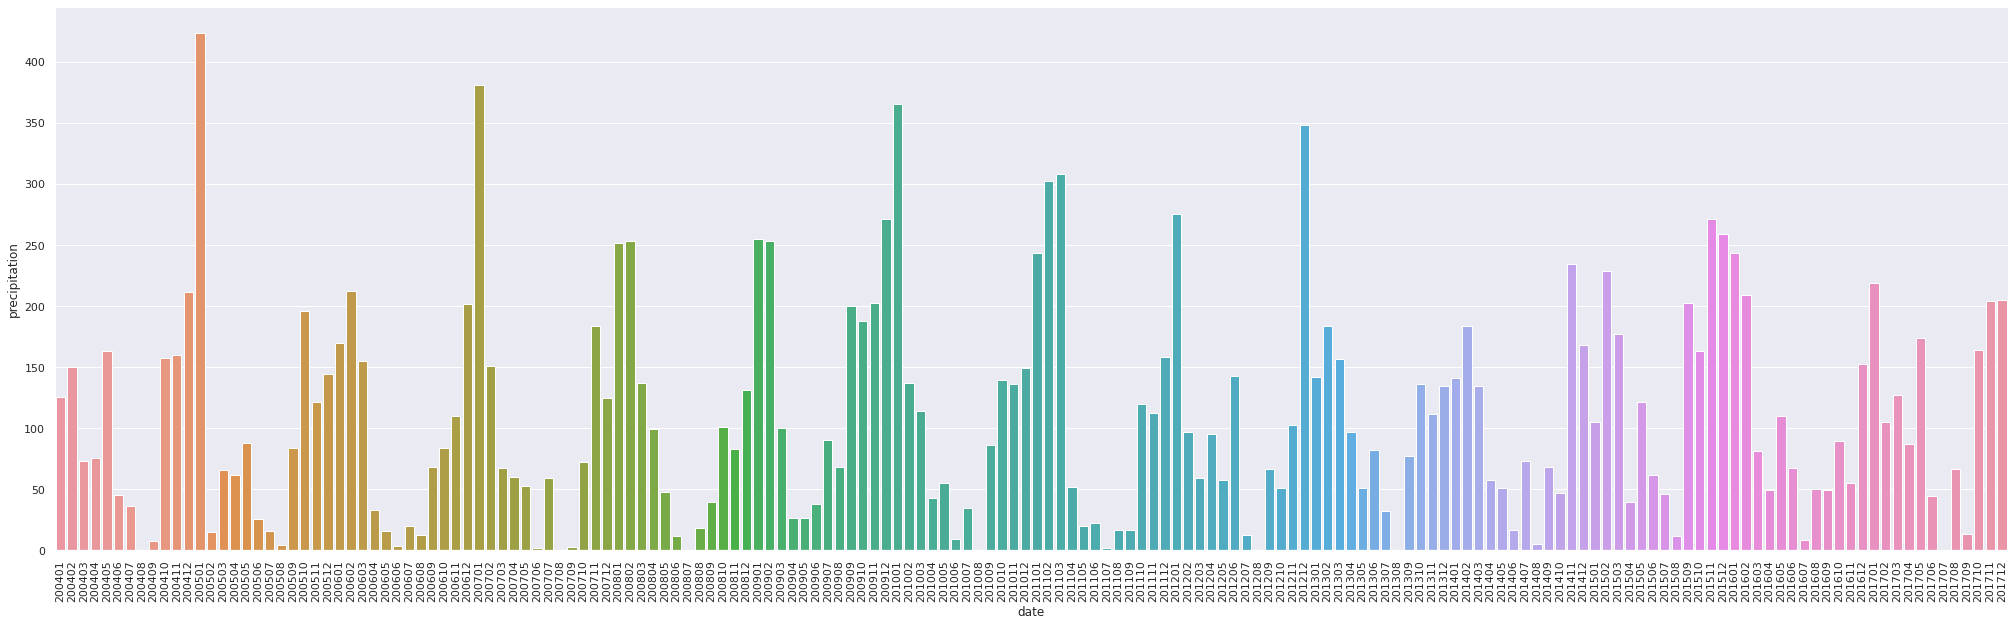

In [70]:
sns.set(rc={'figure.figsize':(35,10)})

g = sns.barplot(data=df_transpose, x="date", y="precipitation")
plt.setp(g.get_xticklabels(), rotation=90)
plt.show()
#da pra por tudo aqui, titulo, mudar cor, etc etc

In [71]:
#pra exportar a tabela
df_transpose.to_csv('/content/sample_data/stats_clean.csv',columns=['precipitation','date'])